## Keypoints
1. Biased Dataset

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

In [ ]:
df = pd.read_csv('rating.csv')

In [ ]:
df.shape

(10841, 13)

In [ ]:
df = df[df['Rating'] <= 5]

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [ ]:
df.shape

(9366, 13)

## Visualization of Data

In [ ]:
df['Rating'].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [ ]:
df['Rating'].value_counts()

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.7      25
2.6      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

## Changing Data Objects

In [ ]:
df['Installs'] = df['Installs'].str.replace('+', '',regex=True)
df['Installs'] = df['Installs'].str.replace(',', '').astype(int)

In [ ]:
def convert_size(size):
    if size.endswith('M'):
        return int(float(size[:-1]) * 1000)
    elif size.endswith('k'):
        return int(float(size[:-1]))
    else:
        return int(-1)

df['Size'] = df['Size'].apply(convert_size).astype(int)

In [ ]:
conditions = [
    df['Type'].str.lower() == 'free',
    df['Type'].str.lower() == 'paid'
]
choices = [0, 1]

df['Type'] = np.select(conditions, choices, default=-1)

In [ ]:
df['Price'] = df['Price'].str.replace('$', '',regex=True)

df['Price'] = df['Price'].astype(float)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming your dataframe is named df and you have a list of columns to encode
columns_to_encode = ['Content Rating', 'Category', 'Genres', 'Current Ver','Android Ver']

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Iterate over the columns and apply label encoding
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
def convert_to_integer(date_str):
    date_object = datetime.strptime(date_str, "%B %d, %Y")
    date_integer = int(date_object.strftime("%Y%m%d"))
    return date_integer

# Apply the conversion function to the 'Date' column
df['Last Updated'] = df['Last Updated'].apply(convert_to_integer)

## Normalizing Data

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

columns_to_normalize = ['Size', 'Installs', 'Last Updated','Reviews']

# Create an instance of the best normalization scaler
# Here, we use StandardScaler as an example
scaler = MinMaxScaler()  # or MinMaxScaler()

# Normalize the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

## Final Dataframe

In [ ]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,0.000002,0.190008,0.00001,0,0.0,1,9,0.991269,107,14
1,Coloring book moana,0,3.9,0.000012,0.140009,0.00050,0,0.0,1,11,0.991368,952,14
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,0.001120,0.087009,0.00500,0,0.0,1,9,0.999913,424,14
3,Sketch - Draw & Paint,0,4.5,0.002759,0.250007,0.05000,0,0.0,4,9,0.997509,2582,17
4,Pixel Draw - Number Art Coloring Book,0,4.3,0.000012,0.028010,0.00010,0,0.0,1,10,0.997658,250,19
5,Paper flowers instructions,0,4.4,0.000002,0.056009,0.00005,0,0.0,1,9,0.869443,103,7
6,Smoke Effect Photo Maker - Smoke Editor,0,3.8,0.000002,0.190008,0.00005,0,0.0,1,9,0.995242,250,14
7,Infinite Painter,0,4.1,0.000471,0.290007,0.00100,0,0.0,1,9,0.997584,2239,17
8,Garden Coloring Book,0,4.4,0.000176,0.330007,0.00100,0,0.0,1,9,0.876842,1365,9
9,Kids Paint Free - Drawing Fun,0,4.7,0.000002,0.031010,0.00001,0,0.0,1,10,0.998692,1340,14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   int64  
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   float64
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   float64
 6   Type            9366 non-null   int64  
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   int64  
 9   Genres          9366 non-null   int64  
 10  Last Updated    9366 non-null   float64
 11  Current Ver     9366 non-null   int64  
 12  Android Ver     9366 non-null   int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 1.0+ MB


## Finding Co-relations

In [ ]:
corr_matrix = df.corr()
corr_matrix['Rating'].sort_values(ascending=False)

<ipython-input-21-f0bec3f877a7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Rating            1.000000
Last Updated      0.138602
Android Ver       0.076248
Reviews           0.068141
Installs          0.051355
Current Ver       0.050569
Size              0.045789
Type              0.039581
Content Rating    0.019868
Price            -0.021903
Category         -0.034603
Genres           -0.046478
Name: Rating, dtype: float64

## Making Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming you have a dataframe named df with numerical features and a target column 'Rating'

# Split the data into input features (X) and target variable (y)
X = df.drop(['Rating','App'], axis=1)  # Select all columns except 'Rating' as input features
y = df['Rating']  # Select 'Rating' column as the target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.2403257340787919


## Cross Validation Techniques

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score

# Assuming you have already trained the linear regression model (model) and split the data (X, y)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=15, scoring='neg_mean_squared_error')

# Convert the negative mean squared errors to positive values
cv_scores = -cv_scores

# Compute the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print("Cross-Validation Scores:")
print(cv_scores)
print(f"Mean CV Score: {mean_cv_score}")
print(f"Std CV Score: {std_cv_score}")

Cross-Validation Scores:
[0.1961255  0.12659275 0.09933982 0.16976473 0.09061952 0.0989752
 0.23873553 0.33933702 0.28828544 0.41037103 0.44030459 0.35666173
 0.3939126  0.27868317 0.36153408]
Mean CV Score: 0.2592828465141547
Std CV Score: 0.11861553301443255


## Plotting Learning Curves

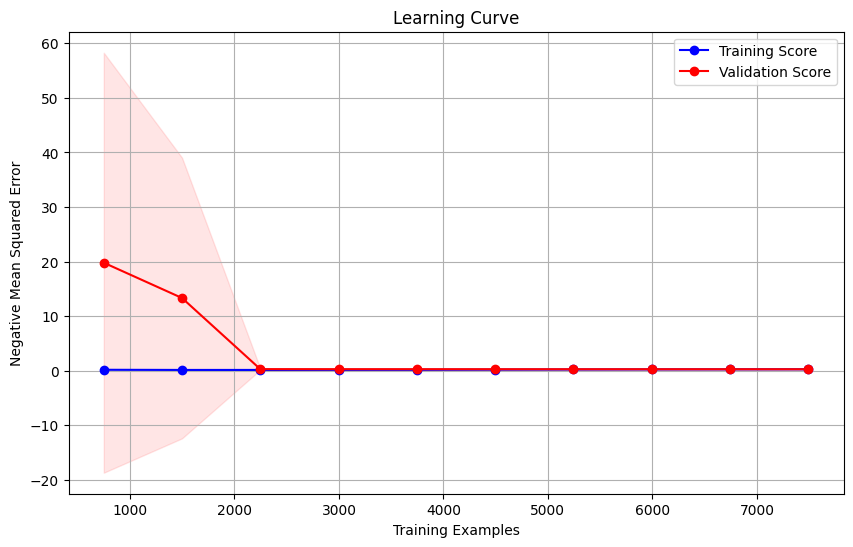

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv, train_sizes=np.linspace(0.1, 1.0, 10)):
    # Generate learning curve data
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='neg_mean_squared_error'
    )

    # Calculate mean and standard deviation of scores
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = -np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Negative Mean Squared Error')

    plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='Training Score')
    plt.fill_between(
        train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='b'
    )

    plt.plot(train_sizes, validation_scores_mean, 'o-', color='r', label='Validation Score')
    plt.fill_between(
        train_sizes,
        validation_scores_mean - validation_scores_std,
        validation_scores_mean + validation_scores_std,
        alpha=0.1,
        color='r'
    )

    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Assuming you have a dataframe named df with numerical features and a target column 'Rating'

# Split the data into input features (X) and target variable (y)
X = df.drop(['Rating', 'App'], axis=1)  # Select all columns except 'Rating' as input features
y = df['Rating']  # Select 'Rating' column as the target variable

# Create an instance of the model you want to evaluate (e.g., Linear Regression, Decision Tree, etc.)
model = LinearRegression()

# Plot the learning curve
plot_learning_curve(model, X, y, cv=5)


In [ ]:
Rat = df[df['Rating'] < 3 ]

In [ ]:
Rat

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
477,Calculator,7,2.6,7.164946e-07,0.062009,9.990000e-07,1,6.99,1,36,0.878150,293,12
518,Just She - Top Lesbian Dating,7,1.9,1.218041e-05,0.190008,9.999900e-05,0,0.00,3,36,0.998879,2278,23
520,EliteSingles – Dating for Single Professionals,7,2.5,6.878348e-05,0.190008,4.999990e-04,0,0.00,3,36,0.999041,1980,14
527,Sugar Daddy Dating App,7,2.5,3.531295e-06,0.057009,9.999900e-05,0,0.00,3,36,0.880379,1433,16
528,Adult Dirty Emojis,7,2.8,1.010769e-06,0.055009,9.999000e-06,0,0.00,4,36,0.879159,103,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10624,Employ Florida Mobile,4,2.9,1.228276e-06,0.099009,9.999000e-06,0,0.00,1,20,0.997571,1933,14
10665,SB · FN 1870 Mobile Banking,12,2.9,1.765647e-06,0.033010,9.999000e-06,0,0.00,1,58,0.873093,1462,12
10677,Pint - FN Theme,23,2.5,6.397273e-08,0.002350,9.900000e-08,0,0.00,1,78,0.377259,103,6
10757,Fisher-Price® Smart Connect™,29,2.7,5.386504e-06,0.720003,4.999900e-05,0,0.00,1,105,0.992714,1220,19


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have a dataframe named df with numerical features X and target variable y

# Separate the input features (X) and the target variable (y)
X = df.drop(['Rating','App'], axis=1)  # Select all columns except 'Rating' as input features
y = df['Rating']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute class weights
class_weights = dict(pd.Series(y_train).value_counts(normalize=True))

# Define the linear regression model
model = LinearRegression()

# Fit the model on the training data with sample weights
model.fit(X_train, y_train, sample_weight=y_train.map(class_weights))

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.2549232592040213


In [ ]:
df.loc[518]

App               Just She - Top Lesbian Dating
Category                                      7
Rating                                      1.9
Reviews                                0.000012
Size                                   0.190008
Installs                                 0.0001
Type                                          0
Price                                       0.0
Content Rating                                3
Genres                                       36
Last Updated                           0.998879
Current Ver                                2278
Android Ver                                  23
Name: 518, dtype: object

In [ ]:
model.predict([X.loc[518]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.32671968])

## Better Evaluation

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


R-squared Score: -0.034121293226383465


In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.34144532426141594


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 0.5048992564898678


## Using Different Models

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming you have a dataframe named df with numerical features X and target variable y

# Separate the input features (X) and the target variable (y)
X = df.drop(['Rating','App'], axis=1)  # Select all columns except 'Rating' as input features
y = df['Rating']

from sklearn.preprocessing import PolynomialFeatures

# Transform the input features to include polynomial terms
degree = 2  # Specify the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Split the data into train and test sets
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Compute class weights
class_weights = dict(pd.Series(y_train).value_counts(normalize=True))

# Define the linear regression model
model = LinearRegression()

# Fit the model on the training data with sample weights
model.fit(X_train_poly, y_train, sample_weight=y_train.map(class_weights))

# Make predictions on the test data
y_pred = model.predict(X_test_poly)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


R-squared Score: -0.016189953515632682


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Assuming you have a dataframe named df with numerical features X and target variable y

# Separate the input features (X) and the target variable (y)
X = df.drop(['Rating','App'], axis=1)  # Select all columns except 'Rating' as input features
y = df['Rating']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute class weights
class_weights = dict(pd.Series(y_train).value_counts(normalize=True))

# Define the linear regression model
model = DecisionTreeRegressor()

# Fit the model on the training data with sample weights
model.fit(X_train, y_train, sample_weight=y_train.map(class_weights))

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


R-squared Score: -0.7975882971134955


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import r2_score

# Assuming you have a dataframe named df with numerical features X and target variable y

# Separate the input features (X) and the target variable (y)
X = df.drop(['Rating','App'], axis=1)  # Select all columns except 'Rating' as input features
y = df['Rating']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute class weights
class_weights = 1.0 / pd.Series(y_train).value_counts(normalize=False)

# Define the linear regression model
model = xgb.XGBRegressor()

# Fit the model on the training data with sample weights
model.fit(X_train, y_train, sample_weight=y_train.map(class_weights))

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


R-squared Score: -0.6939301666704831


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

# Assuming you have a dataframe named df with numerical features X and target variable y

# Separate the input features (X) and the target variable (y)
X = df.drop(['Rating','App'], axis=1)  # Select all columns except 'Rating' as input features
y = df['Rating']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the linear regression model
model = MLPRegressor()

# Fit the model on the training data with sample weights
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


R-squared Score: -0.20606501419499446


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Assuming you have a dataframe named df with numerical features X and target variable y

# Separate the input features (X) and the target variable (y)
X = df.drop(['Rating','App'], axis=1)  # Select all columns except 'Rating' as input features
y = df['Rating']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute class weights
class_weights = 1.0 / pd.Series(y_train).value_counts(normalize=False)

# Define the linear regression model
model = RandomForestRegressor()

# Fit the model on the training data with sample weights
model.fit(X_train, y_train, sample_weight=y_train.map(class_weights))

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


R-squared Score: 0.18869919439200034


In [ ]:
model.predict([X.loc[528]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([2.965])

In [ ]:
y.loc[528]

2.8

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=30,  # Number of parameter settings that are sampled
    scoring='r2',  # Scoring metric for evaluation
    cv=5,  # Number of cross-validation folds
    verbose=3,  # Verbosity level (increase for more information)
    n_jobs=-1  # Number of parallel jobs (-1 to use all available cores)
)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Print the best parameter combination found
print("Best Parameters:", random_search.best_params_)

# Make predictions using the best estimator
y_pred = random_search.best_estimator_.predict(X_test)

# Evaluate the model performance
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
R-squared Score: 0.20081770381201902


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
R-squared Score: 0.19668141645514592

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [190, 220],  # Number of trees in the forest
    'max_depth': [None, 5],  # Maximum depth of the trees
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [2, 6],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt'],  # Number of features to consider when looking for the best split
    'bootstrap': [True]  # Whether bootstrap samples are used when building trees
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [ ]:
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

R-squared Score: 0.20068872711460095


In [ ]:
best_params

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 190}

In [ ]:
filename = 'bb_model.sav'

In [ ]:
import pickle


pickle.dump(best_model, open(filename, 'wb'))

In [ ]:
new_model = pickle.load(open(filename, 'rb'))

In [ ]:
new_model.predict([X.loc[528]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([3.11257327])

In [ ]:
y.loc[528]

2.8

In [ ]:
y_pred = new_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

R-squared Score: 0.20068872711460095
